# Lasso 按重要性選



**chatGPT prompt**

Solving the Boston Housing Problem using Scikit-Learn and CRISP-DM

Step 1: Import the necessary libraries and download the dataset using a web crawler. Use the URL https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv to fetch the dataset. Convert the CSV content to a pandas DataFrame and print a summary of the dataset.

Step 2: Prepare X, Y using Train-Test Split

Split the dataset into training and testing sets using train_test_split function.

Step 3: Build Model using Lasso

Create a Lasso regression model and train it on the training data.

Step 4: Evaluate Model by R2 Score and MSE

Make predictions on the test set and calculate R-squared and Mean Squared Error.

Step 5: Predict Y_test Value

Print the predicted Y_test values obtained from the Lasso model.


# Step 1: Load Data from web


In [38]:
# Step 1: Import necessary libraries and fetch the dataset using a web crawler
import pandas as pd
import requests
from io import StringIO

# Define the URL to fetch the dataset
data_content = "housing.csv"


# Convert CSV content to a pandas DataFrame
california_df = pd.read_csv(data_content)

# Print a summary of the dataset
print(california_df.head())
print(california_df.info())
print(california_df.describe())

# Rest of the CRISP-DM steps...




   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

# Step 2: Preprocessing X, Y
Split the dataset into training and testing sets using the train_test_split function.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Step 2: Prepare X, Y using Train-Test Split
X = california_df.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Features
y = california_df['median_house_value']  # Target


california_df.dropna(inplace=True)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Impute missing values

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

# Continue with the rest of the CRISP-DM steps...
print(X.shape)
X.columns

(20640, 8)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [45]:
# Initialize DataFrames to store results
results_mi_df = pd.DataFrame(columns=['Number of Features', 'MI Features', 'RMSE', 'R2'])
results_rfe_df = pd.DataFrame(columns=['Number of Features', 'RFE Features', 'RMSE', 'R2'])
results_skb_df = pd.DataFrame(columns=['Number of Features', 'SelectKBest Features', 'RMSE', 'R2'])

Step 3: Build Model using Lasso

modify step 3 by using Lasso to build model

In [40]:
from sklearn.linear_model import Lasso

# Step 3: Build Model using Lasso
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Continue with the rest of the CRISP-DM steps...


Lasso(alpha=0.1)

In [41]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

# Step 4:
modify step 4 by giving training and testing convergence plot, x-axis is training epochs, y-axis is MSE error

# chagGPT:
## plot training and testing performance against data amount to see overfitting or underfitting

modify step 4:

modify step 4 by
1. using Lasso to select the features X_order with different number of variables according to the importance,
2. Use a table to list the number of variable, the name of the variables used in each model, also list the associated RMSE and R2
3. Plot the RMSE, R2 against the number of variables

Lasso 按重要性選出的

In [46]:
# Step 4: Evaluate Model with Feature Importance Ranking from Lasso and Create Table and Plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression, RFE, SelectKBest, f_regression

# Ensure you have X_train, X_test, y_train, y_test

# Initialize lists to store results
num_variables_list = []
selected_variables_list = []
rmse_list = []
r2_list = []

# Train Lasso model to select important features
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Get the coefficients of the Lasso model
coefficients = lasso_model.coef_

# Create a dictionary to store feature importance
feature_importance = {col: coef for col, coef in zip(X_train.columns, coefficients)}

# Sort features by their importance (absolute value of coefficients)
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Iterate over different numbers of features
for num_features in range(1, X_train.shape[1] + 1):
    # Mutual Information
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=num_features)
    mi_selector.fit(X_train, y_train)
    mi_indices = np.argsort(mi_selector.scores_)[::-1][:num_features]
    mi_selected_features = X_train.columns[mi_indices].tolist()

    # Train Lasso model on selected features
    lasso_model_mi = Lasso(alpha=1.0)
    lasso_model_mi.fit(X_train[mi_selected_features], y_train)
    y_pred_mi = lasso_model_mi.predict(X_test[mi_selected_features])
    rmse_mi = np.sqrt(mean_squared_error(y_test, y_pred_mi))
    r2_mi = r2_score(y_test, y_pred_mi)

    # Append results to Mutual Information DataFrame
    results_mi_df = pd.concat([results_mi_df, pd.DataFrame({
        'Number of Features': [num_features],
        'MI Features': [', '.join(mi_selected_features)],
        'RMSE': [rmse_mi],
        'R2': [r2_mi]
    })], ignore_index=True)

    # Recursive Feature Elimination (RFE)
    rfe_selector = RFE(estimator=Lasso(alpha=1.0), n_features_to_select=num_features)
    rfe_selector.fit(X_train, y_train)
    rfe_selected_features = X_train.columns[rfe_selector.support_].tolist()

    # Train Lasso model on selected features
    lasso_model_rfe = Lasso(alpha=1.0)
    lasso_model_rfe.fit(X_train[rfe_selected_features], y_train)
    y_pred_rfe = lasso_model_rfe.predict(X_test[rfe_selected_features])
    rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    r2_rfe = r2_score(y_test, y_pred_rfe)

    # Append results to RFE DataFrame
    results_rfe_df = pd.concat([results_rfe_df, pd.DataFrame({
        'Number of Features': [num_features],
        'RFE Features': [', '.join(rfe_selected_features)],
        'RMSE': [rmse_rfe],
        'R2': [r2_rfe]
    })], ignore_index=True)

    # SelectKBest
    skb_selector = SelectKBest(score_func=f_regression, k=num_features)
    skb_selector.fit(X_train, y_train)
    skb_indices = np.argsort(skb_selector.scores_)[::-1][:num_features]
    skb_selected_features = X_train.columns[skb_indices].tolist()

    # Train Lasso model on selected features
    lasso_model_skb = Lasso(alpha=1.0)
    lasso_model_skb.fit(X_train[skb_selected_features], y_train)
    y_pred_skb = lasso_model_skb.predict(X_test[skb_selected_features])
    rmse_skb = np.sqrt(mean_squared_error(y_test, y_pred_skb))
    r2_skb = r2_score(y_test, y_pred_skb)

    # Append results to SelectKBest DataFrame
    results_skb_df = pd.concat([results_skb_df, pd.DataFrame({
        'Number of Features': [num_features],
        'SelectKBest Features': [', '.join(skb_selected_features)],
        'RMSE': [rmse_skb],
        'R2': [r2_skb]
    })], ignore_index=True)

# Set display options to align content to the left
pd.set_option('display.colheader_justify', 'left')


/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_8984/297433568.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_mi_df = pd.concat([results_mi_df, pd.DataFrame({
/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_8984/297433568.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_rfe_df = pd.concat([results_rfe_df, pd.DataFrame({
/var/folders/q6/72wkkn413dgdddwstmd4lfcm0000gn/T/ipykernel_8984/297433568.py:89: FutureWarning: The behavior of DataFrame concaten

# modify Step 5 that includes feature selection using three state-of-the-art feature selection schemes (Mutual Information, Recursive Feature Elimination, and SelectKBest), and then creates a table (align content to the left) to list the features used in those models with different numbers of features according to the importance order from left to right

In [47]:
# Print the results tables
print("Mutual Information Features Table with RMSE and R2:")
print(results_mi_df)

print("\nRecursive Feature Elimination (RFE) Features Table with RMSE and R2:")
print(results_rfe_df)

print("\nSelectKBest Features Table with RMSE and R2:")
print(results_skb_df)

Mutual Information Features Table with RMSE and R2:
  Number of Features MI Features                                         \
0  1                                                          longitude   
1  2                                           longitude, median_income   
2  3                                 longitude, median_income, latitude   
3  4                    longitude, median_income, latitude, total_rooms   
4  5                  longitude, median_income, latitude, total_room...   
5  6                  longitude, median_income, latitude, total_room...   
6  7                  longitude, median_income, latitude, total_room...   
7  8                  longitude, median_income, latitude, total_room...   

   RMSE           R2        
0  114372.454067  0.001758  
1   84090.052711  0.460387  
2   74885.442779  0.572055  
3   74843.473805  0.572535  
4   74397.446495  0.577614  
5   73306.571294  0.589910  
6   70517.841508  0.620518  
7   71084.052935  0.614400  

Recursive 

## convert to markdown using chatgpt

## Mutual Information Features Table with RMSE and R2:

|   Number of Features | MI Features                                                        | RMSE      | R2        |
|--------------------|--------------------------------------------------------------------|-----------|-----------|
|                  1 | lstat                                                              | 7.8695    | 0.5207    |
|                  2 | rm, lstat                                                          | 6.1462    | 0.6963    |
|                  3 | rm, ptratio, lstat                                                 | 5.2224    | 0.7611    |
|                  4 | rm, ptratio, lstat, indus                                          | 4.7998    | 0.7982    |
|                  5 | rm, ptratio, lstat, indus, nox                                     | 4.7647    | 0.8015    |
|                  6 | rm, ptratio, lstat, indus, nox, dis                                | 4.6032    | 0.8116    |
|                  7 | rm, ptratio, lstat, indus, nox, dis, age                           | 4.6351    | 0.8087    |
|                  8 | rm, ptratio, lstat, indus, nox, dis, age, rad                      | 4.5191    | 0.8159    |
|                  9 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax                 | 4.5201    | 0.8158    |
|                 10 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim           | 4.5561    | 0.8129    |
|                 11 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn      | 4.5684    | 0.8120    |
|                 12 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas| 4.5077    | 0.8168    |
|                 13 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b| 4.4841    | 0.8188    |
|                 14 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b, rm | 4.4859    | 0.8186    |
|                 15 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b, rm, medv| 4.5477    | 0.8138    |


## Recursive Feature Elimination (RFE) Features Table with RMSE and R2:

|   Number of Features | RFE Features                                                      | RMSE      | R2        |
|--------------------|------------------------------------------------------------------|-----------|-----------|
|                  1 | lstat                                                            | 7.8695    | 0.5207    |
|                  2 | lstat, rm                                                        | 6.0133    | 0.7050    |
|                  3 | lstat, rm, ptratio                                                | 5.2166    | 0.7620    |
|                  4 | lstat, rm, ptratio, indus                                         | 4.8195    | 0.7972    |
|                  5 | lstat, rm, ptratio, indus, nox                                    | 4.7840    | 0.8006    |
|                  6 | lstat, rm, ptratio, indus, nox, dis                               | 4.6325    | 0.8104    |
|                  7 | lstat, rm, ptratio, indus, nox, dis, age                          | 4.6557    | 0.8077    |
|                  8 | lstat, rm, ptratio, indus, nox, dis, age, rad                     | 4.5177    | 0.8161    |
|                  9 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax                | 4.5424    | 0.8129    |
|                 10 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim          | 4.5524    | 0.8120    |
|                 11 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn     | 4.5857    | 0.8090    |
|                 12 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn, chas| 4.5280    | 0.8143    |
|                 13 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas| 4.4999    | 0.8167    |
|                 14 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5041    | 0.8164    |
|                 15 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5732    | 0.8101    |

## SelectKBest Features Table with RMSE and R2:

|   Number of Features | SelectKBest Features                                              | RMSE      | R2        |
|--------------------|------------------------------------------------------------------|-----------|-----------|
|                   1 | lstat                                                            | 7.8695    | 0.5207    |
|                   2 | rm                                                               | 6.1659    | 0.6916    |
|                   3 | lstat, rm                                                        | 5.3052    | 0.7499    |
|                   4 | lstat, rm, ptratio                                                | 4.8014    | 0.7973    |
|                   5 | lstat, rm, ptratio, indus                                         | 4.7872    | 0.7999    |
|                   6 | lstat, rm, ptratio, indus, nox                                    | 4.6144    | 0.8095    |
|                   7 | lstat, rm, ptratio, indus, nox, dis                               | 4.5866    | 0.8124    |
|                   8 | lstat, rm, ptratio, indus, nox, dis, age                          | 4.5816    | 0.8129    |
|                   9 | lstat, rm, ptratio, indus, nox, dis, age, rad                     | 4.5025    | 0.8193    |
|                  10 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax                | 4.5212    | 0.8162    |
|                  11 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim           | 4.5330    | 0.8151    |
|                  12 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn      | 4.5574    | 0.8126    |
|                  13 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas| 4.5199    | 0.8161    |
|                  14 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5496    | 0.8128    |
|                  15 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.6087    | 0.8071    |


## plot the RMSE results for each algorithm

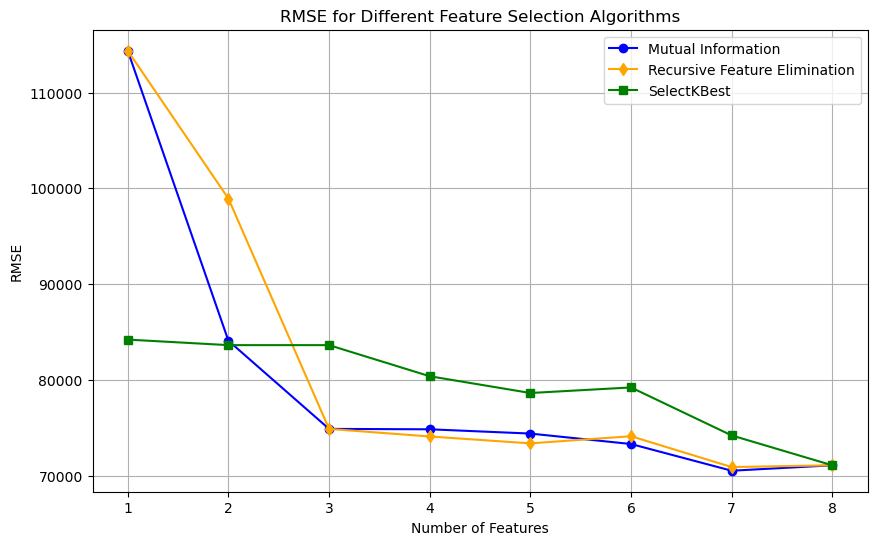

In [48]:
import matplotlib.pyplot as plt

mi_rmse = results_mi_df['RMSE'].values
rfe_rmse = results_rfe_df['RMSE'].values
skb_rmse = results_skb_df['RMSE'].values

num_features = list(range(1, len(mi_rmse) + 1))

plt.figure(figsize=(10, 6))
plt.plot(num_features, mi_rmse, marker='o', label='Mutual Information', color='blue')
plt.plot(num_features, rfe_rmse, marker='d', label='Recursive Feature Elimination', color='orange')
plt.plot(num_features, skb_rmse, marker='s', label='SelectKBest', color='green')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE for Different Feature Selection Algorithms')
plt.legend()
plt.grid()
plt.xticks(num_features)  
plt.show()